# Visualizing categorical variables using oncoPrint

In [1]:
import os,sys
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
from PyComplexHeatmap import *
import pandas as pd
import random

In [2]:
# Create toy dataset
samples = [f'Sample_{i}' for i in range(1, 11)]
genes = [f'Gene_{i}' for i in range(1, 11)]

alts_lol = list()

for sample in samples:
    for gene in genes:
        amp_value = random.randint(0, 1)
        
        if amp_value == 0:
            del_value = random.randint(0, 1)
            
        else:
            del_value = 0
            
        if (amp_value == 0) & (del_value == 0):
            neut_value = 1
            
        else:
            neut_value = 0
            
        alts_lol.append([sample, gene, amp_value, neut_value, del_value])

alts_df = pd.DataFrame(alts_lol, columns=['sample', 'gene', 'amp', 'neut', 'del'])

# Prepare column annotations
annot_1_df = pd.DataFrame([[i, random.randint(0,100)] for i in samples], columns=['sample', 'annot1'])
annot_1_df.index = annot_1_df['sample']

annot_2_df = pd.DataFrame([[i, random.randint(500, 5000)] for i in samples], columns=['sample', 'annot2'])
annot_2_df.index = annot_2_df['sample']

annot_3_df = pd.DataFrame([[i, 'patient' + str(random.randint(1,5))] for i in samples], 
                            columns=['sample', 'patient'])
annot_3_df.index = annot_3_df['sample']

In [3]:
alts_df

,sample,gene,amp,neut,del
0,Sample_1,Gene_1,1,0,0
1,Sample_1,Gene_2,1,0,0
2,Sample_1,Gene_3,0,1,0
3,Sample_1,Gene_4,0,0,1
4,Sample_1,Gene_5,1,0,0
...,...,...,...,...,...
95,Sample_10,Gene_6,1,0,0
96,Sample_10,Gene_7,1,0,0
97,Sample_10,Gene_8,1,0,0
98,Sample_10,Gene_9,0,1,0


In [4]:
annot_3_df

,sample,patient
sample,,
Sample_1,Sample_1,patient4
Sample_2,Sample_2,patient3
Sample_3,Sample_3,patient5
Sample_4,Sample_4,patient1
Sample_5,Sample_5,patient1
Sample_6,Sample_6,patient3
Sample_7,Sample_7,patient3
Sample_8,Sample_8,patient4
Sample_9,Sample_9,patient3


In [5]:
annot_1_df

,sample,annot1
sample,,
Sample_1,Sample_1,31
Sample_2,Sample_2,5
Sample_3,Sample_3,26
Sample_4,Sample_4,96
Sample_5,Sample_5,17
Sample_6,Sample_6,32
Sample_7,Sample_7,4
Sample_8,Sample_8,96
Sample_9,Sample_9,3


In [6]:
annot_2_df

,sample,annot2
sample,,
Sample_1,Sample_1,4870
Sample_2,Sample_2,4572
Sample_3,Sample_3,2378
Sample_4,Sample_4,4970
Sample_5,Sample_5,4662
Sample_6,Sample_6,1196
Sample_7,Sample_7,3065
Sample_8,Sample_8,2553
Sample_9,Sample_9,4390


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 21.344444444444445 mm


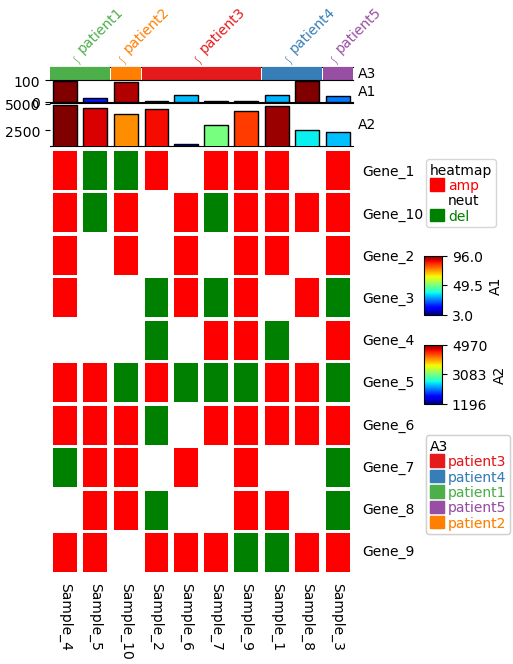

In [7]:
top_annotation=HeatmapAnnotation(label=anno_label(annot_3_df.patient, merge=True,rotation=45),
                                 A3=anno_simple(annot_3_df['patient']),
                                 A1=anno_barplot(annot_1_df['annot1'],height=5),
                                 A2=anno_barplot(annot_2_df['annot2']))

# Plot oncoprint
plt.figure(figsize=(4,6))

op=oncoPrintPlotter(data=alts_df, y='gene', x='sample', values=['amp', 'neut', 'del'], 
                    show_rownames=True, show_colnames=True, colors=['red', 'white', 'green'],
                    top_annotation=top_annotation, col_split=annot_3_df['patient'], 
                    col_split_gap=0.2,width=0.8) 
#width control the width of the bar in each cell
# there are other plot_kws, such as 'align'

# Remove the grid
# for annotation in op.top_annotation.annotations:
#     ax=annotation.ax
#     ax.grid(False)
#     #remove spines for top annotation and right annotation
#     despine(ax=ax,left=False, bottom=True, right=False, top=True)
#     despine(ax=ax,left=True, bottom=False, right=True, top=False)

# Remove the grid
for ax in op.top_annotation.axes.flatten():
    ax.grid(False)
    #remove spines for top annotation and right annotation
    despine(ax=ax,left=False, bottom=True, right=False, top=True)
    despine(ax=ax,left=True, bottom=False, right=True, top=False)